Analyzing chain length: 3
  Analyzing q: 1.0


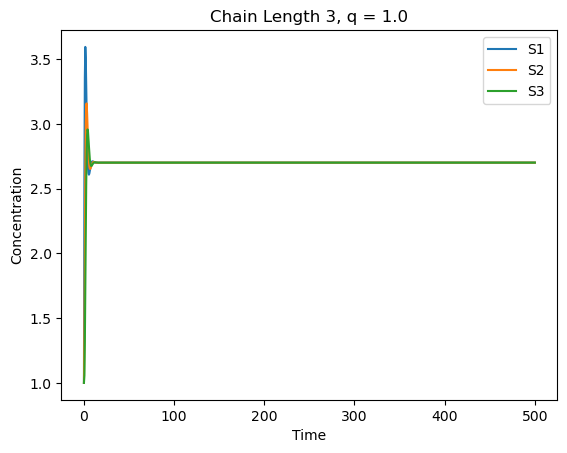

  Analyzing q: 1.4444444444444444


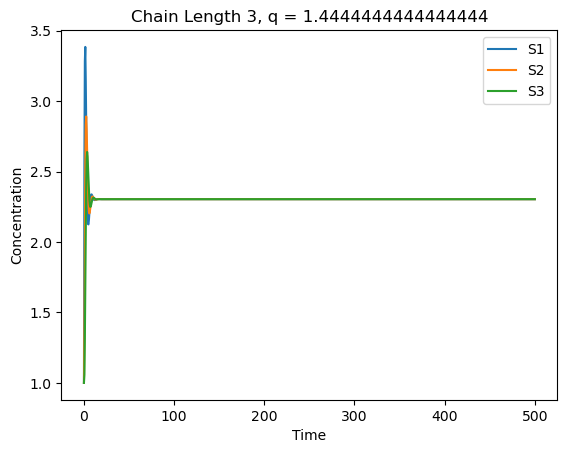

  Analyzing q: 1.8888888888888888


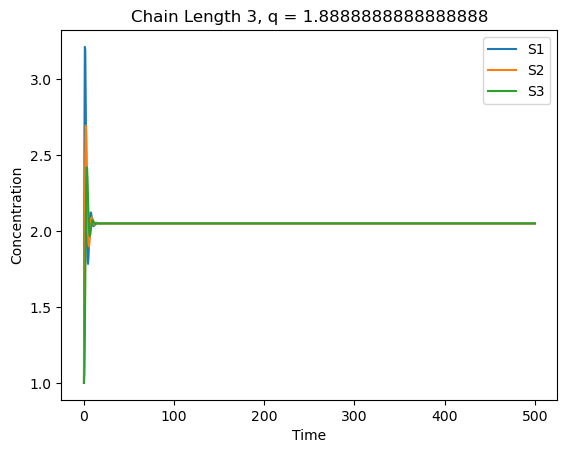

  Analyzing q: 2.333333333333333


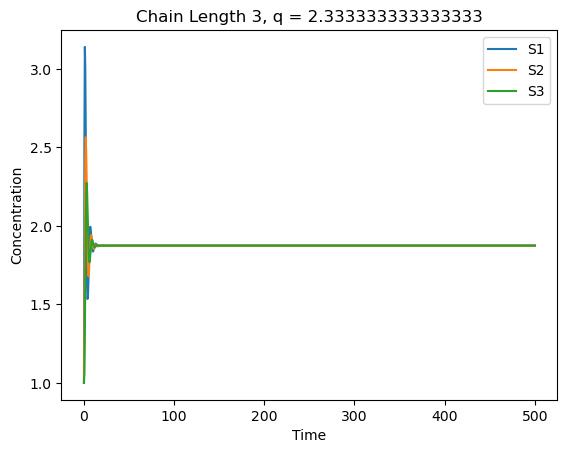

  Analyzing q: 2.7777777777777777


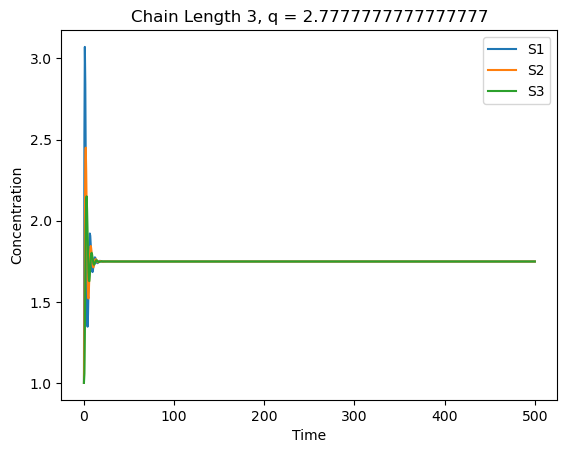

  Analyzing q: 3.2222222222222223


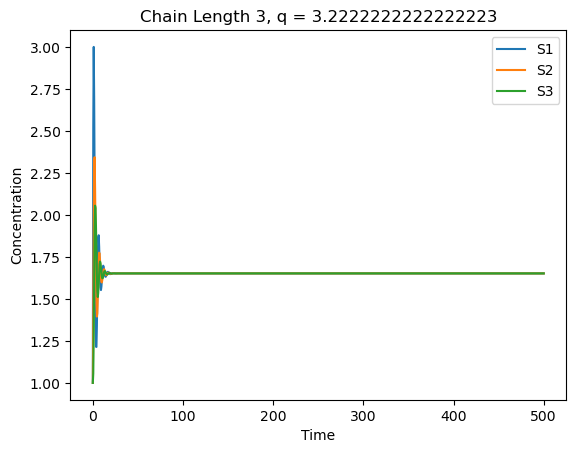

  Analyzing q: 3.6666666666666665


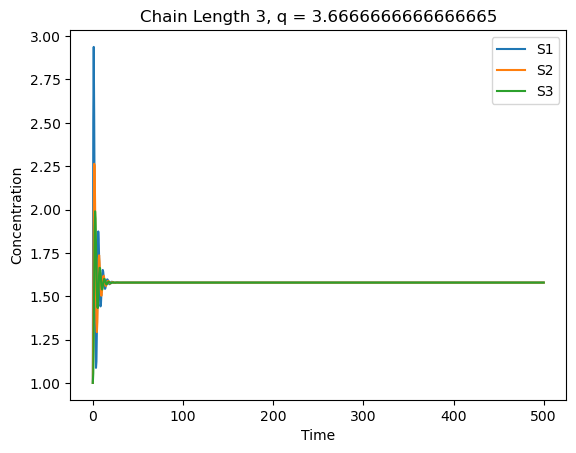

  Analyzing q: 4.111111111111111


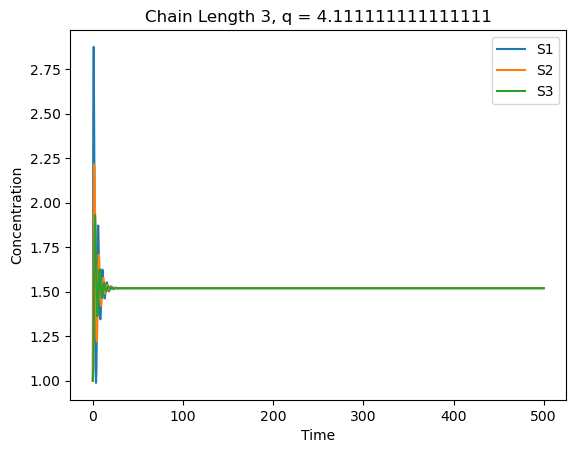

  Analyzing q: 4.555555555555555


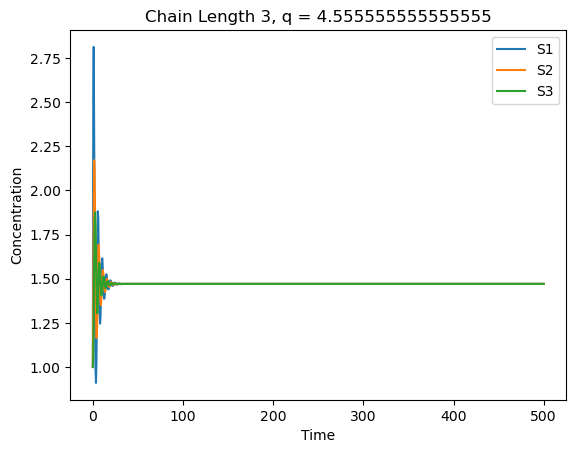

  Analyzing q: 5.0


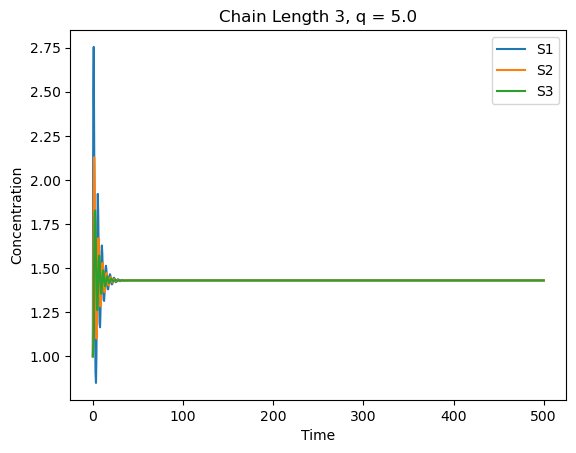

Analyzing chain length: 5
  Analyzing q: 1.0


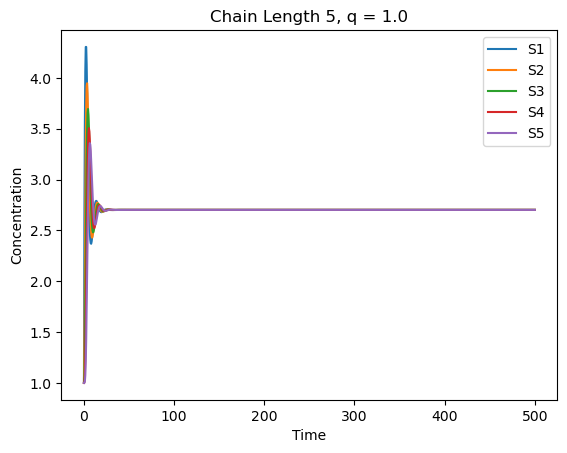

  Analyzing q: 1.4444444444444444


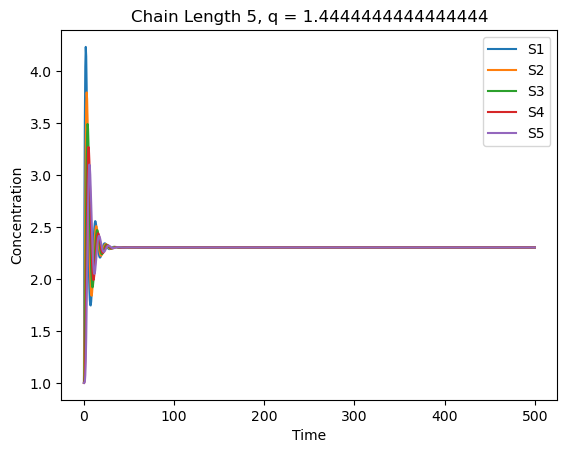

  Analyzing q: 1.8888888888888888


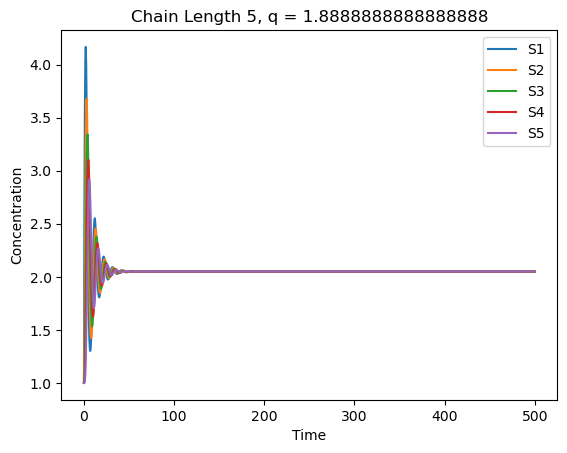

  Analyzing q: 2.333333333333333


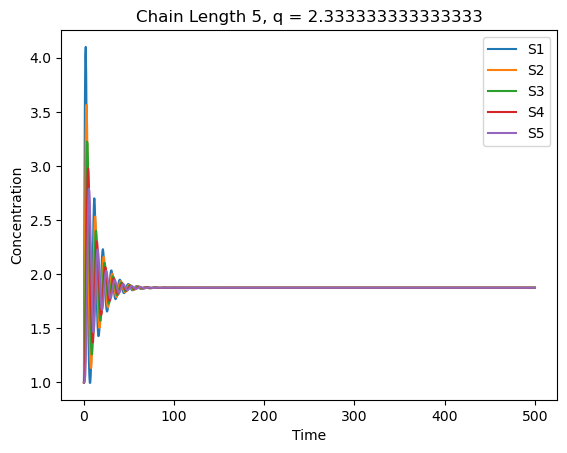

  Analyzing q: 2.7777777777777777


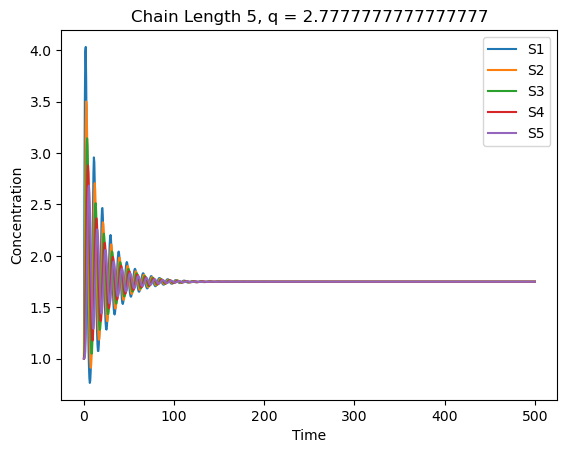

  Analyzing q: 3.2222222222222223


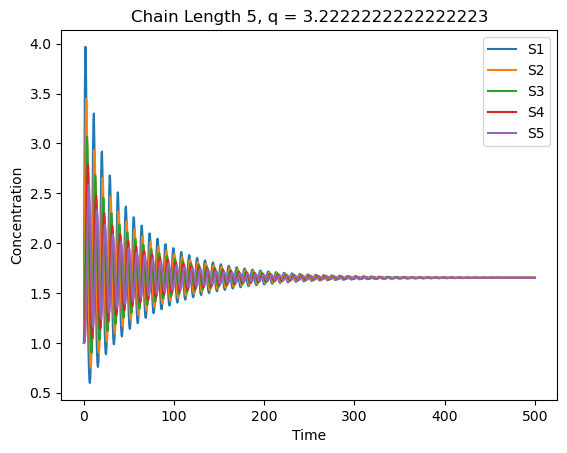

  Analyzing q: 3.6666666666666665


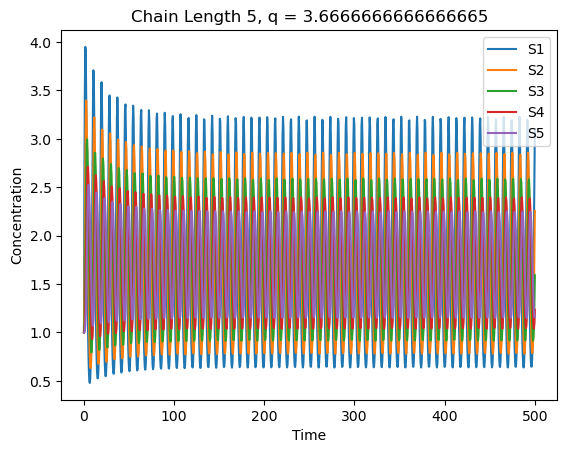

  Analyzing q: 4.111111111111111


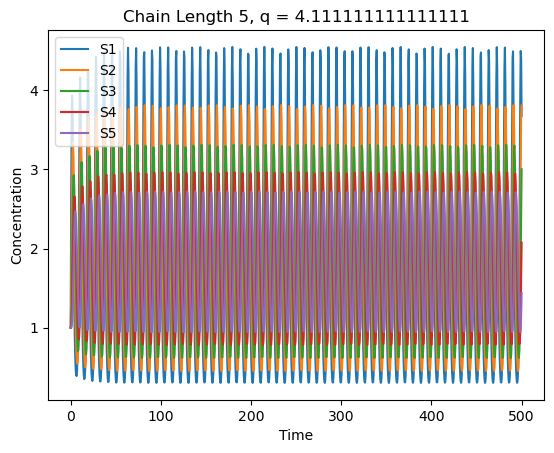

  Analyzing q: 4.555555555555555


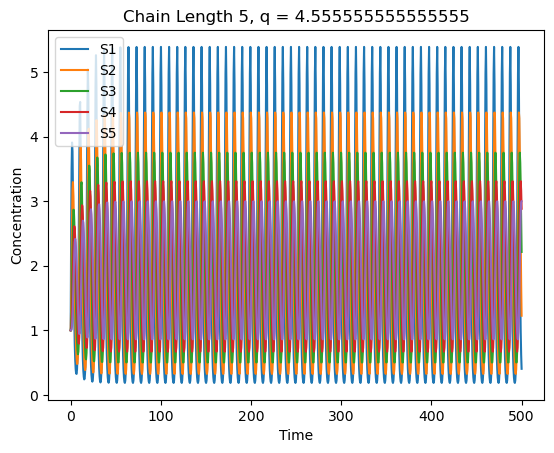

  Analyzing q: 5.0


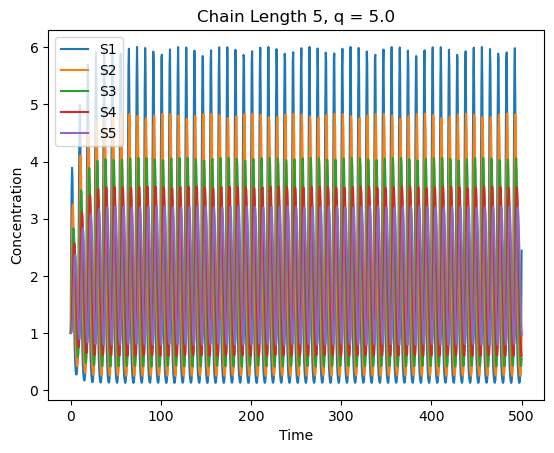

Analyzing chain length: 10
  Analyzing q: 1.0


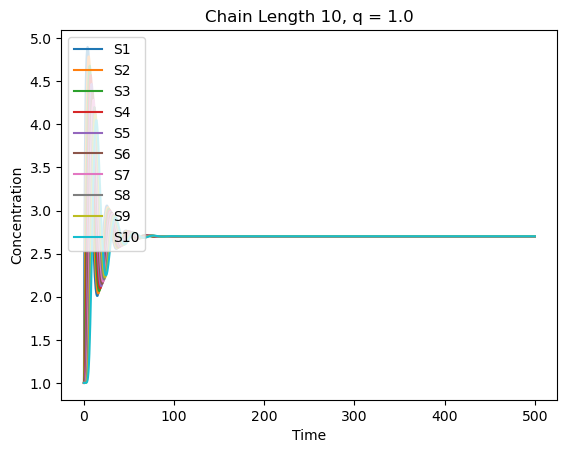

  Analyzing q: 1.4444444444444444


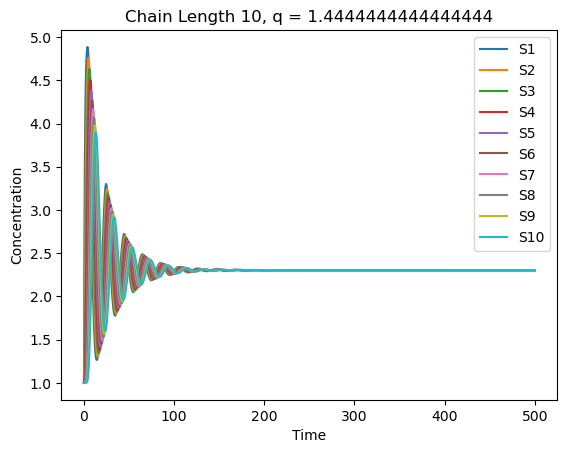

  Analyzing q: 1.8888888888888888


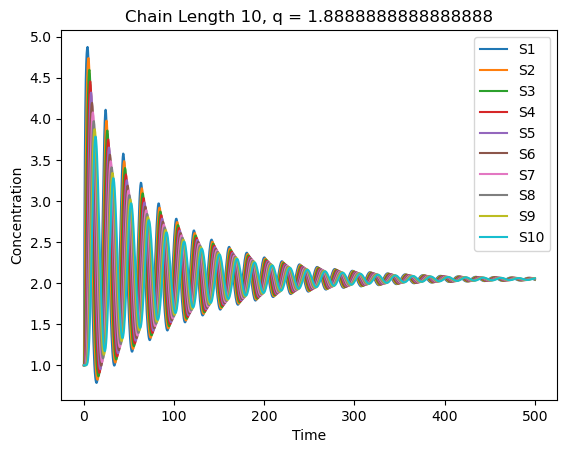

  Analyzing q: 2.333333333333333


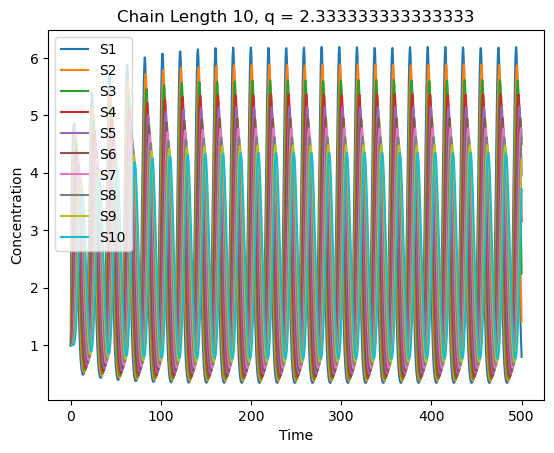

  Analyzing q: 2.7777777777777777


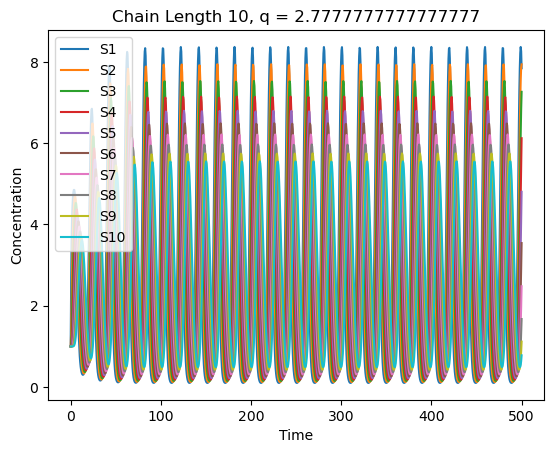

  Analyzing q: 3.2222222222222223


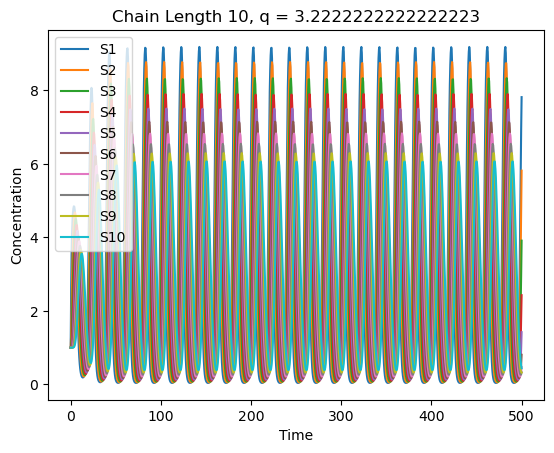

  Analyzing q: 3.6666666666666665


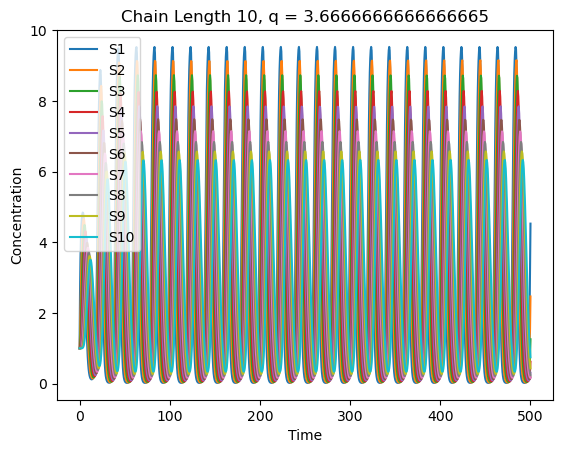

  Analyzing q: 4.111111111111111


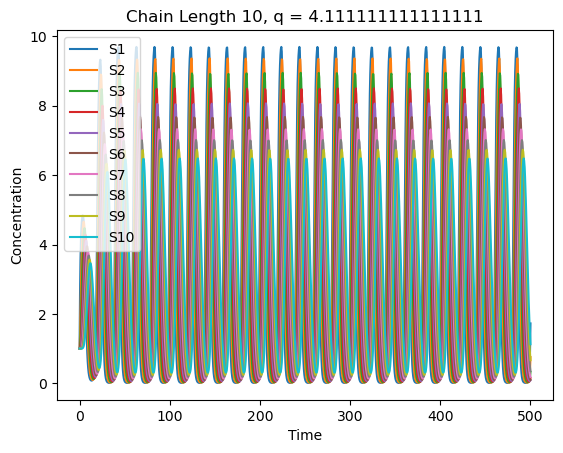

  Analyzing q: 4.555555555555555


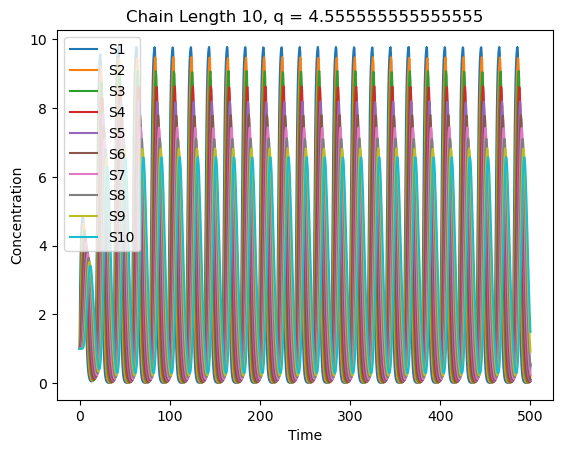

  Analyzing q: 5.0


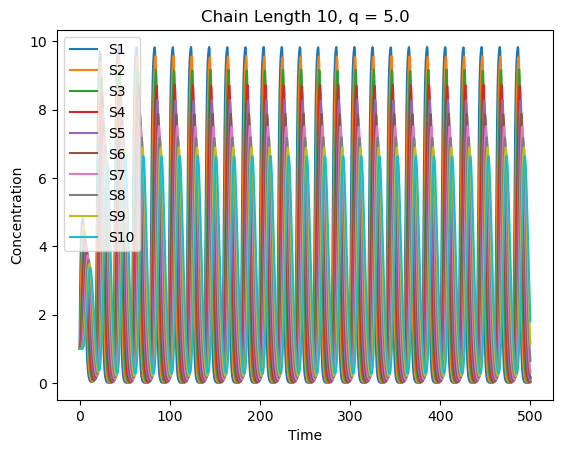

Analyzing chain length (alternative): 3
  Analyzing q: 1.0


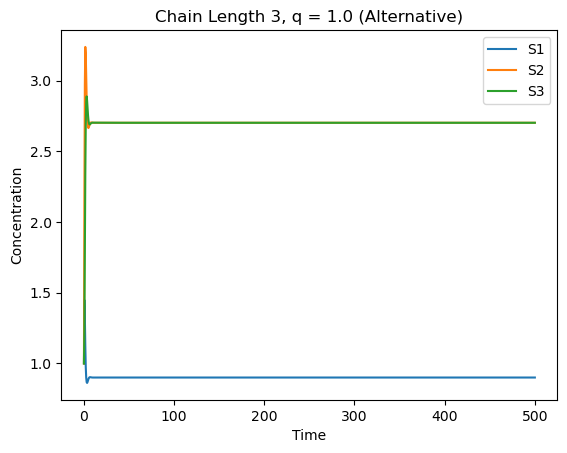

  Analyzing q: 1.4444444444444444


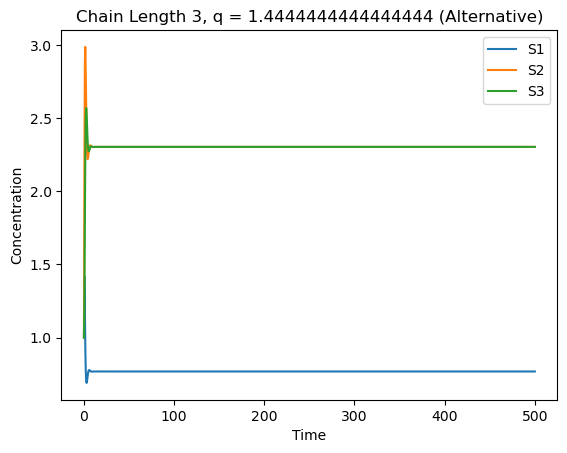

  Analyzing q: 1.8888888888888888


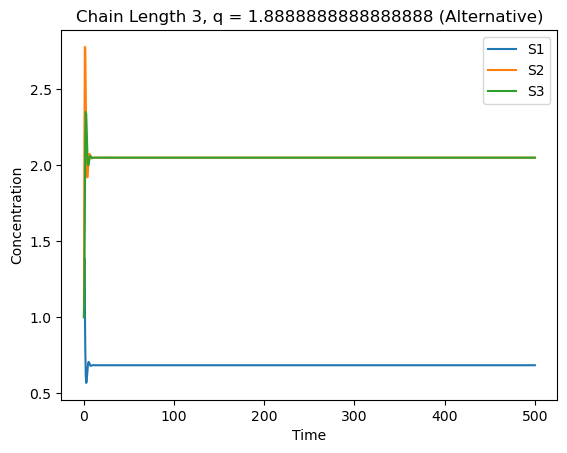

  Analyzing q: 2.333333333333333


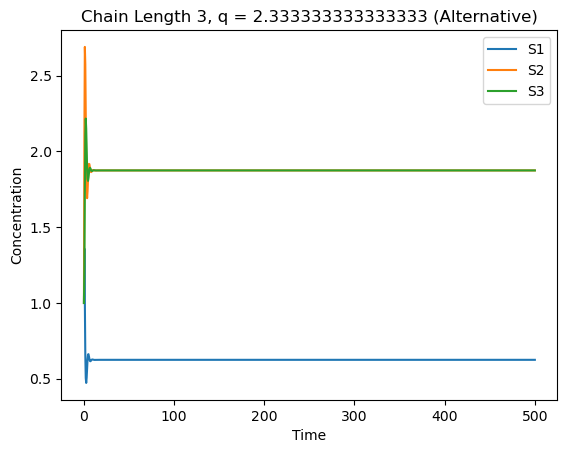

  Analyzing q: 2.7777777777777777


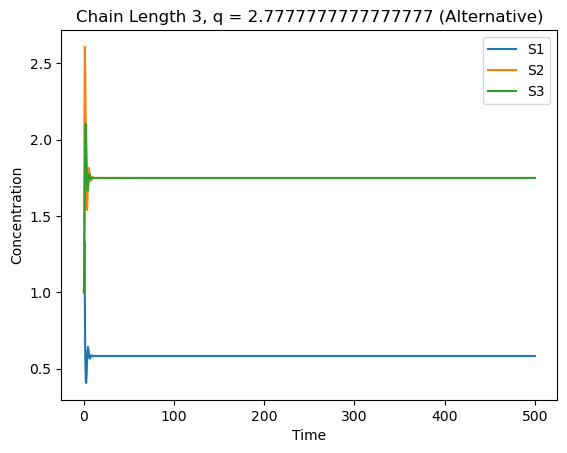

  Analyzing q: 3.2222222222222223


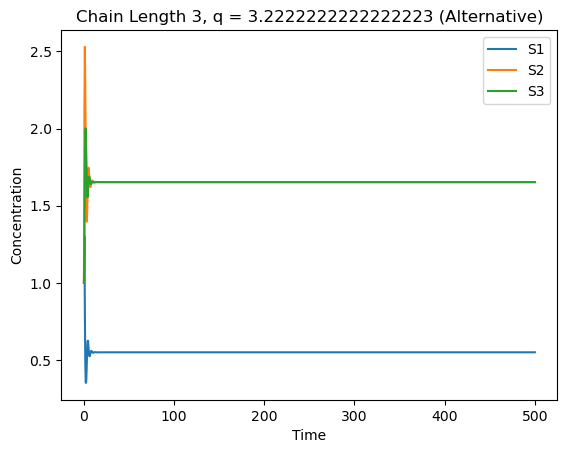

  Analyzing q: 3.6666666666666665


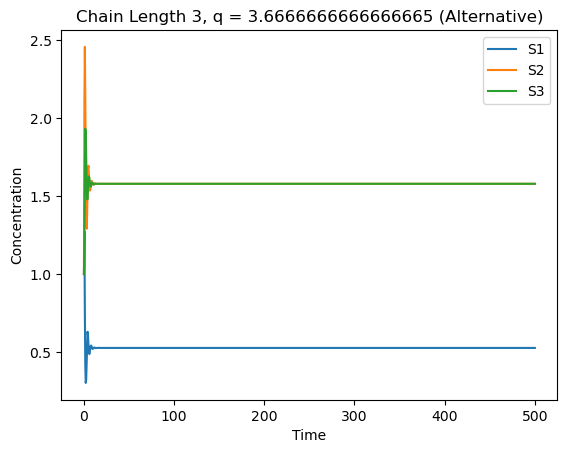

  Analyzing q: 4.111111111111111


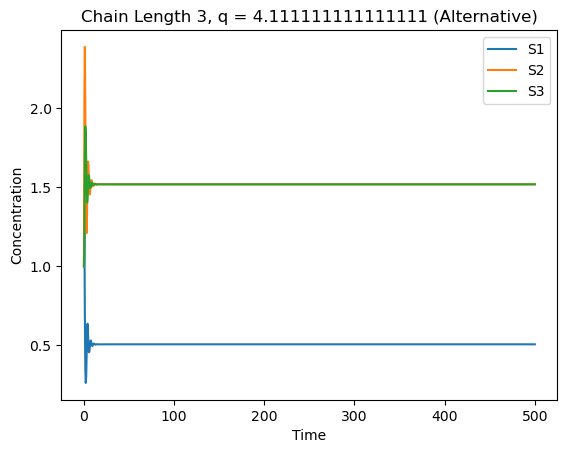

  Analyzing q: 4.555555555555555


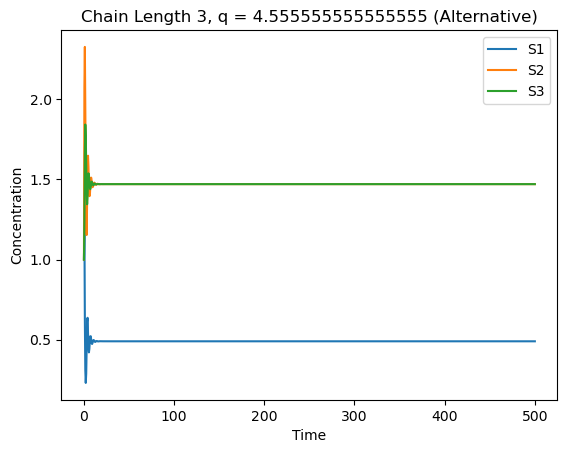

  Analyzing q: 5.0


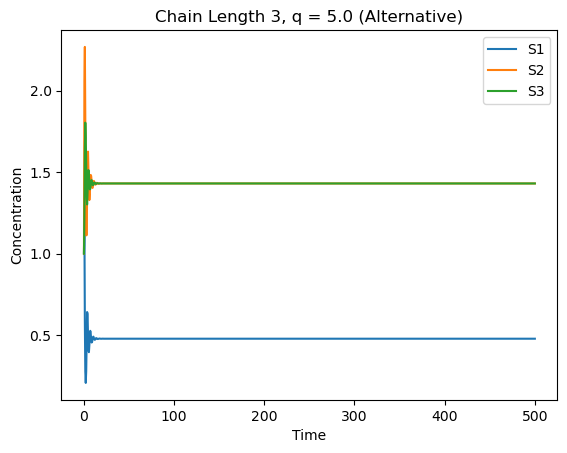

Analyzing chain length (alternative): 5
  Analyzing q: 1.0


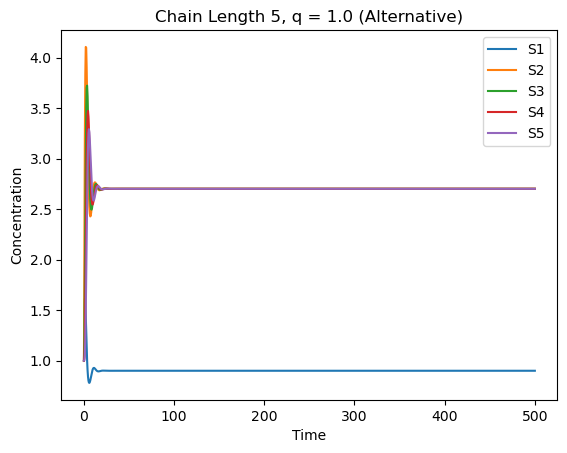

  Analyzing q: 1.4444444444444444


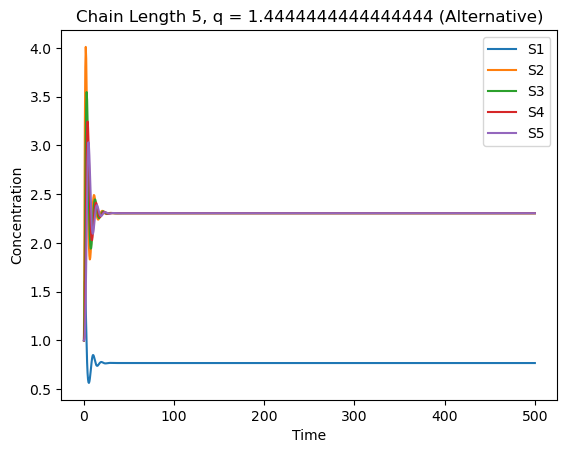

  Analyzing q: 1.8888888888888888


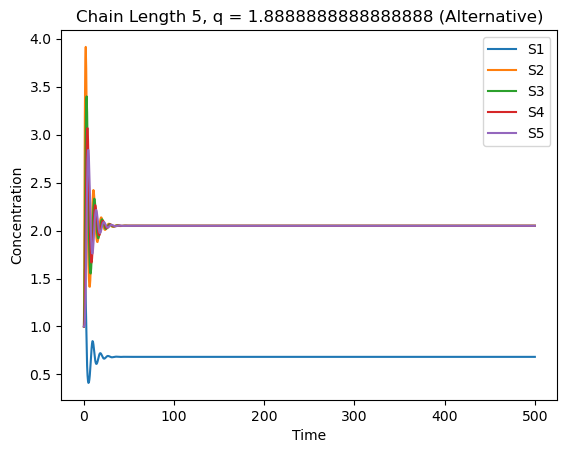

  Analyzing q: 2.333333333333333


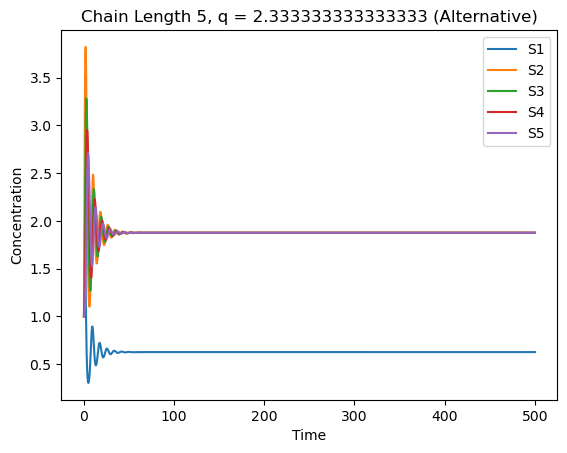

  Analyzing q: 2.7777777777777777


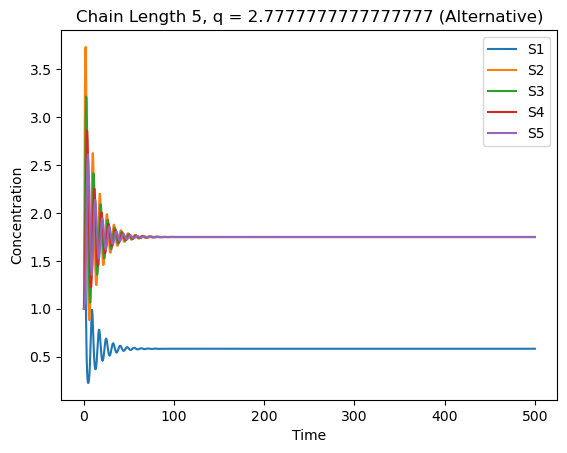

  Analyzing q: 3.2222222222222223


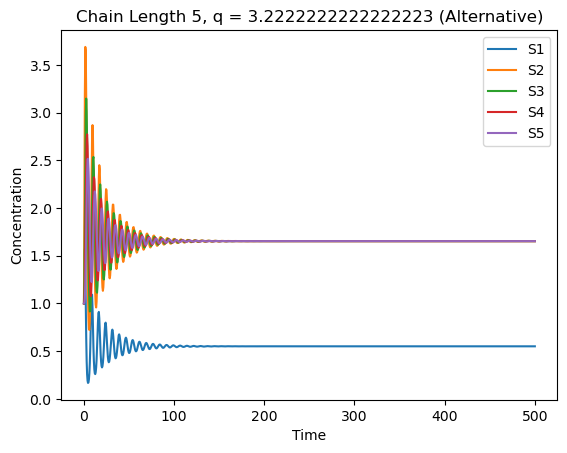

  Analyzing q: 3.6666666666666665


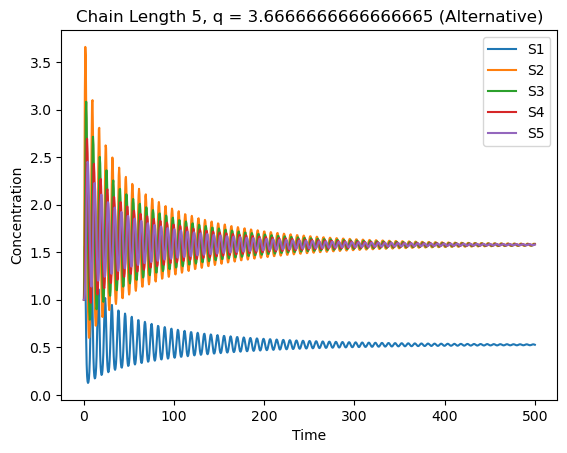

  Analyzing q: 4.111111111111111


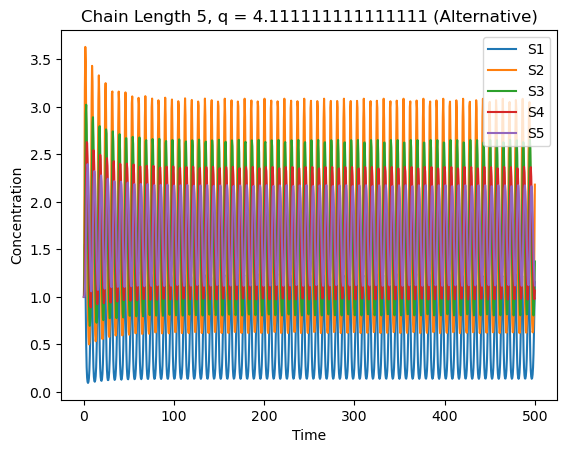

  Analyzing q: 4.555555555555555


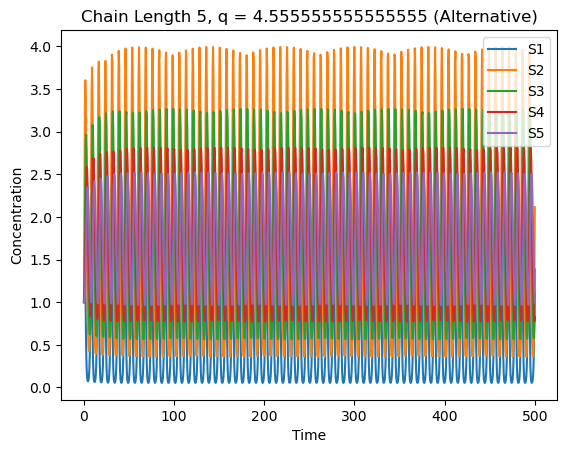

  Analyzing q: 5.0


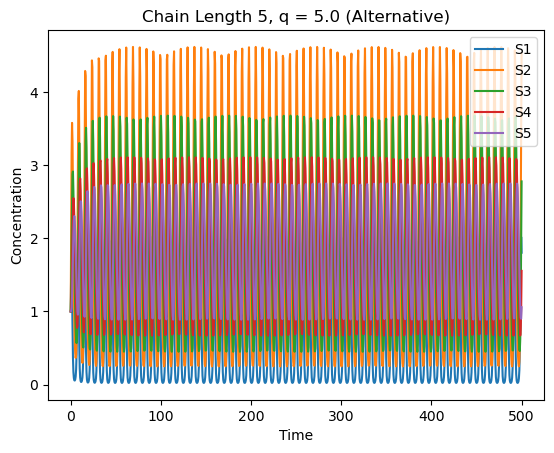

Analyzing chain length (alternative): 10
  Analyzing q: 1.0


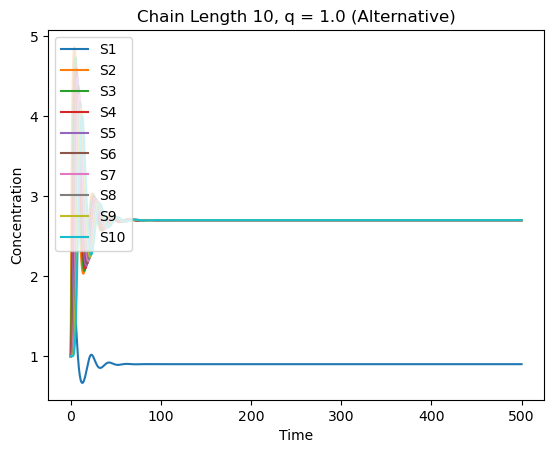

  Analyzing q: 1.4444444444444444


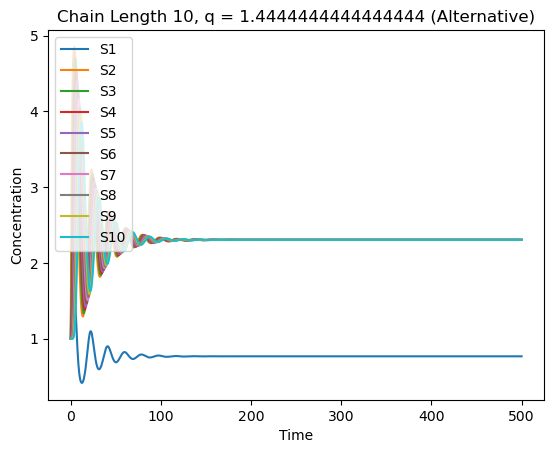

  Analyzing q: 1.8888888888888888


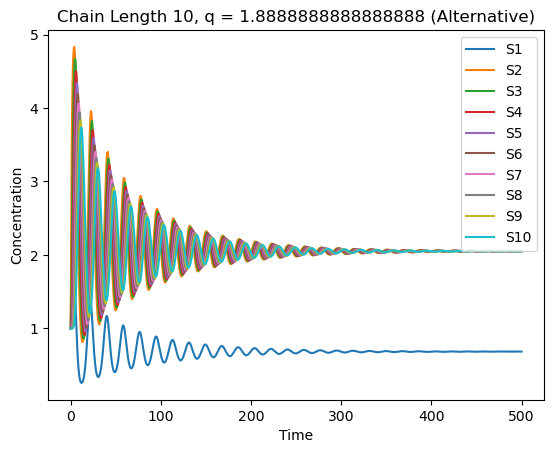

  Analyzing q: 2.333333333333333


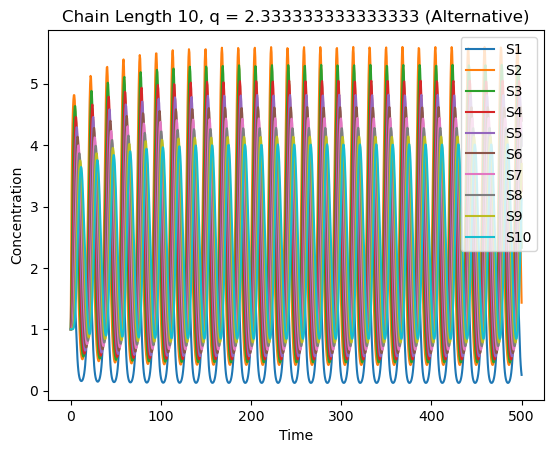

  Analyzing q: 2.7777777777777777


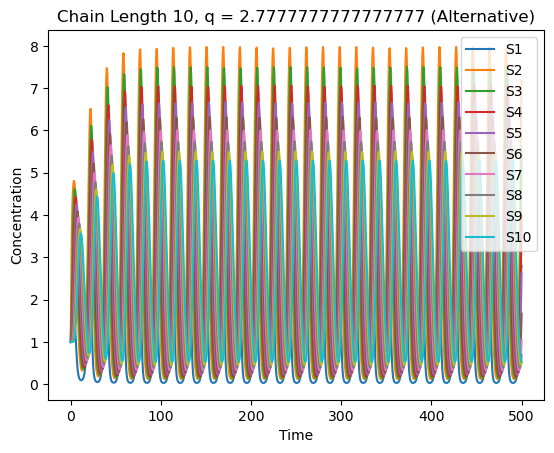

  Analyzing q: 3.2222222222222223


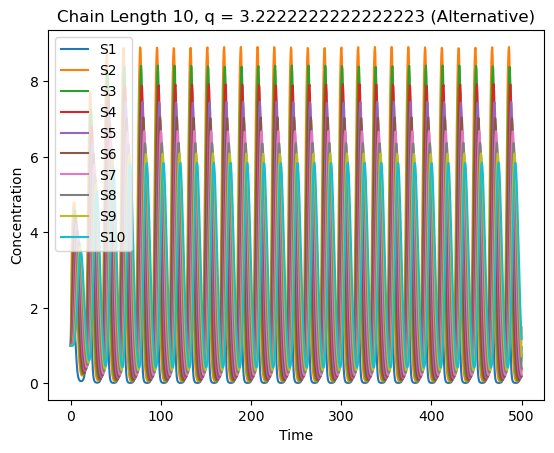

  Analyzing q: 3.6666666666666665


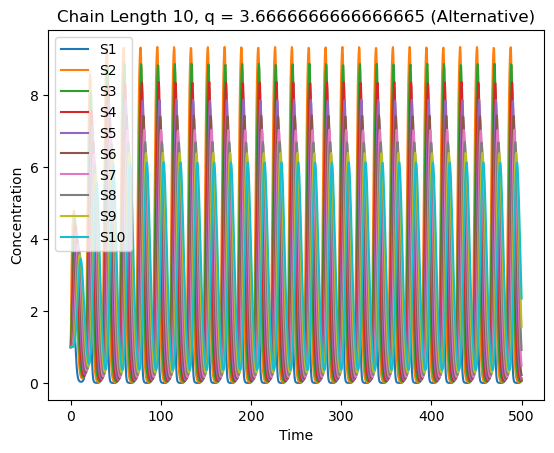

  Analyzing q: 4.111111111111111


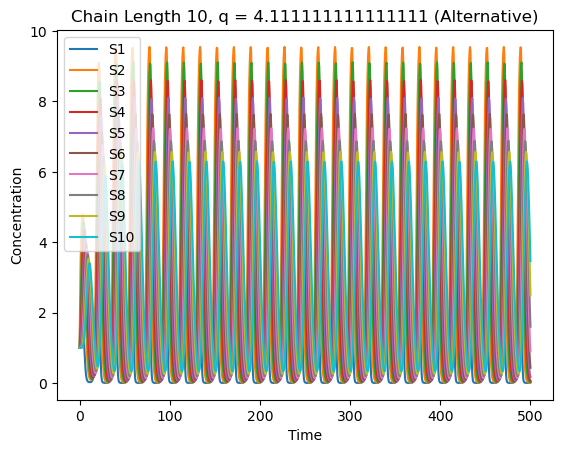

  Analyzing q: 4.555555555555555


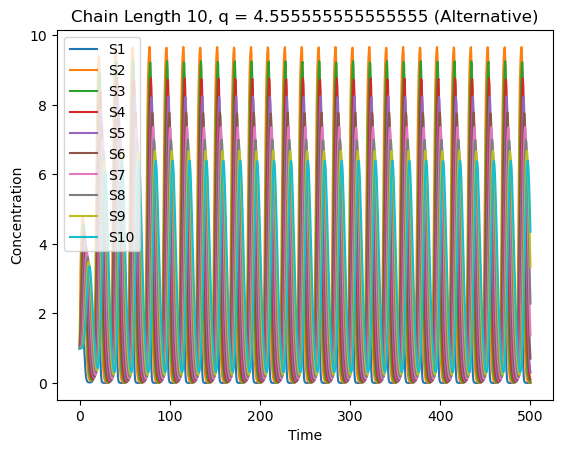

  Analyzing q: 5.0


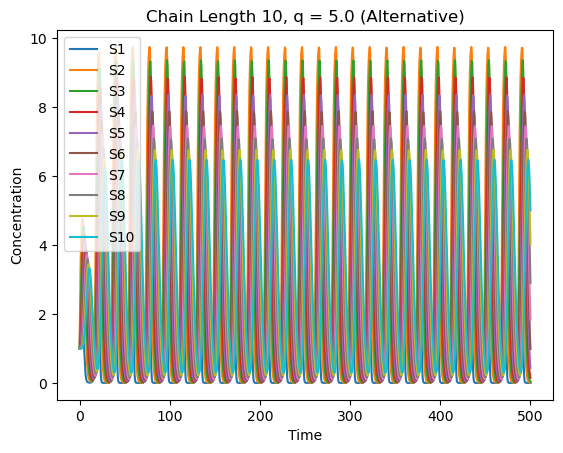

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of ODEs
def metabolic_chain(S, t, v, q, k):
    n = len(S)  # Number of species
    dSdt = np.zeros(n)

    # Rate of the first reaction
    v0 = v / (1 + S[-1]**q)

    # First species
    dSdt[0] = v0 - k[0] * S[0]

    # Intermediate species
    for i in range(1, n):
        dSdt[i] = k[i - 1] * S[i - 1] - k[i] * S[i]

    return dSdt

# Simulation parameters
v = 10
q_values = np.linspace(1, 5, 10)  # Range of q values to test
n_values = [3, 5, 10]  # Different chain lengths

# Nominal parameter set (a)
k_nominal = [1] * 10  # Assuming up to 10 species

# Time range for simulation
time = np.linspace(0, 500, 1000)  # Simulate for 100 time units

# Analyze behavior for different chain lengths and q values
for n in n_values:
    print(f"Analyzing chain length: {n}")
    for q in q_values:
        print(f"  Analyzing q: {q}")

        # Initial conditions (all species start at 1.0)
        S0 = np.ones(n)

        # Simulate the system
        S = odeint(metabolic_chain, S0, time, args=(v, q, k_nominal[:n]))

        # Plot the results
        plt.figure()
        for i in range(n):
            plt.plot(time, S[:, i], label=f"S{i+1}")
        plt.title(f"Chain Length {n}, q = {q}")
        plt.xlabel("Time")
        plt.ylabel("Concentration")
        plt.legend()
        plt.show()

# Alternative parameter set (b)
k_alternative = [3] + [1] * 9  # k1 = 3, others = 1

for n in n_values:
    print(f"Analyzing chain length (alternative): {n}")
    for q in q_values:
        print(f"  Analyzing q: {q}")

        # Initial conditions (all species start at 1.0)
        S0 = np.ones(n)

        # Simulate the system
        S = odeint(metabolic_chain, S0, time, args=(v, q, k_alternative[:n]))

        # Plot the results
        plt.figure()
        for i in range(n):
            plt.plot(time, S[:, i], label=f"S{i+1}")
        plt.title(f"Chain Length {n}, q = {q} (Alternative)")
        plt.xlabel("Time")
        plt.ylabel("Concentration")
        plt.legend()
        plt.show()


In [2]:
[1] * 10

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]